In [2]:
import numpy as np
import pandas as pd

## Creating a DataFrame

In [76]:
np.random.seed(23)

In [78]:
mu_vec1 = np.array([0, 0, 0])

In [80]:
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

In [82]:
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)

In [84]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


## Creating 3D Plot

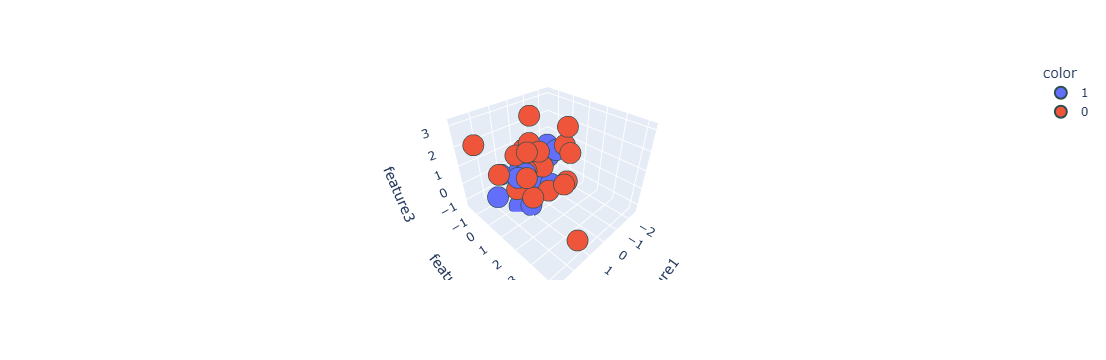

In [87]:
import plotly.express as px
# y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
                   color=df['target'].astype(str))
fig.update_traces(marker=dict(size=12,
                             line=dict(width=2,
                                      color='DarkSlateGrey')),
                 selector=dict(mode='markers'))
fig.show()

In [89]:
# Step 1 mean centring (applying Standard Scaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:, 0:3] = scaler.fit_transform(df.iloc[:, 0:3])

In [91]:
# Step 2 Finding covariance Matrix
covariance_matrix = np.cov([df.iloc[:, 0], df.iloc[:, 1], df.iloc[:,2]])
print('Covariance Matrix: \n', covariance_matrix)

Covariance Matrix: 
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [93]:
# Step 3 Finding Eigen Values and Eigen Vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [95]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [97]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [99]:
pc = eigen_vectors[0:2] # first 2eigen vectors
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [101]:
transformed_df = np.dot(df.iloc[:, 0:3], pc.T)

In [103]:
new_df = pd.DataFrame(transformed_df, columns=['PC1', 'PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


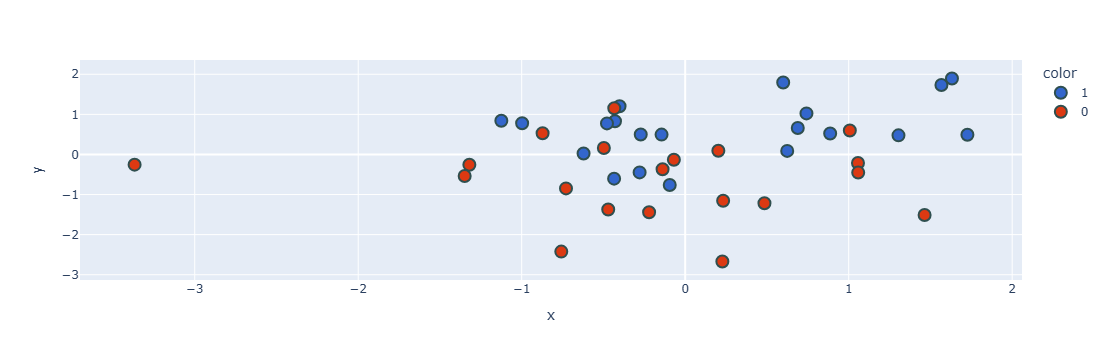

In [105]:

new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()